In [3]:
# Importing all the libraries required for the project.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import style
style.use("fivethirtyeight") #Set plot style
%matplotlib inline
pd.set_option('display.precision', 2) #set display precision to 2 decimal points
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.grid_search import GridSearchCV

# Human Resources Data Analytics Using Machine Learning
### Group - 10
*  Darshan Kasat
* Shivam Thassu
* Smrithi Ajit

### Import the csv file and read it using pandas.
+ Rename the columns.
+ Make a plot for missing numbers.

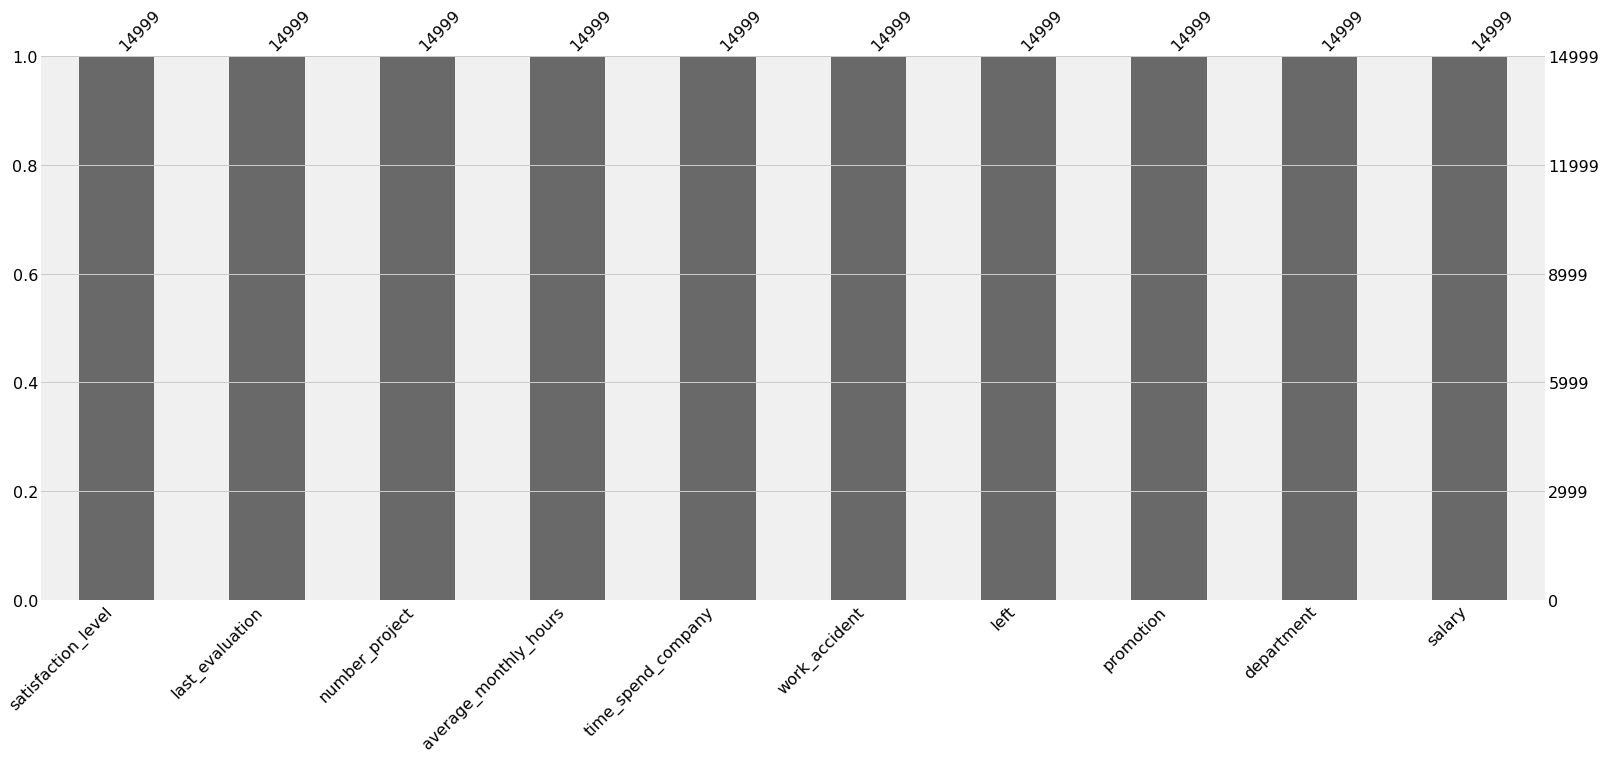

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.columns = ["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "time_spend_company", "work_accident", "left", "promotion", "department", "salary"]
msno.bar(df)

### Exploratory Data Analysis.
+ Distribution plot using seaborn for Employee Satisfaction for the employees those who have left and those who have stayed.
+ Count plot of salaries for employees who left and who did not
+ Scatter plot between Employee Satisfaction and Employee last evaluation (left)
+ Scatter plot between Employee Satisfaction and Employee Average Monthly hours (left)

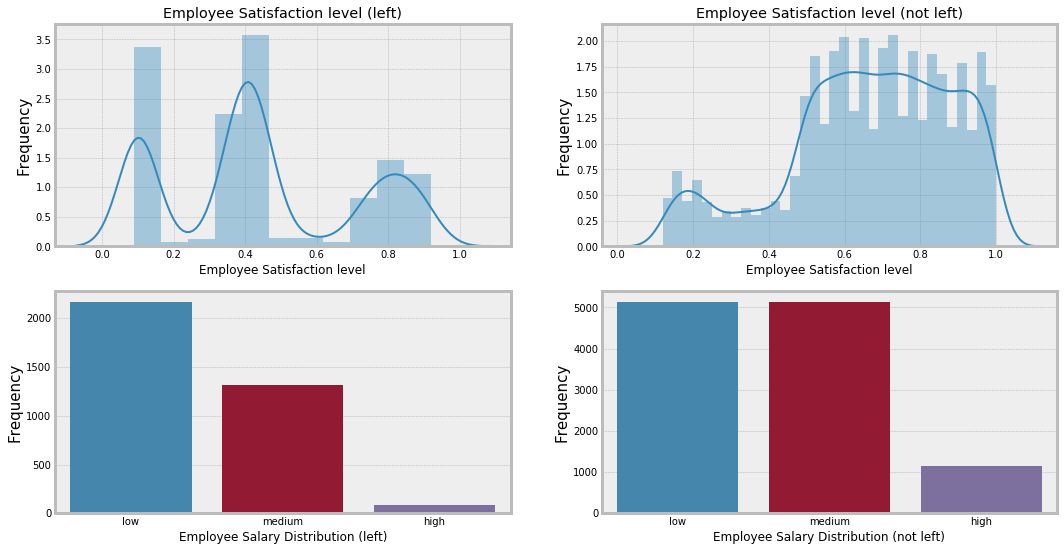

In [5]:
style.use("bmh")
df_left_1 = df.loc[df['left'] == 1]  #subset the dataframe (Employees who left)
df_not_left = df.loc[df['left'] == 0] #Subset the dataframe (not left)
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(df_left_1["satisfaction_level"]) #distplot for satisfaction level of employees who left
plt.title("Employee Satisfaction level (left)")
plt.xlabel("Employee Satisfaction level", fontsize = 12)
plt.ylabel("Frequency", fontsize = 15)

plt.subplot(2,2,2)
sns.distplot(df_not_left["satisfaction_level"]) #distplot for satisfaction level of employees who not left
plt.title("Employee Satisfaction level (not left)")
plt.xlabel("Employee Satisfaction level", fontsize = 12)
plt.ylabel("Frequency", fontsize = 15)

plt.subplot(2,2,3)
sns.countplot(df_left_1["salary"]) #countplot of salary of employees who left.
plt.xlabel("Employee Salary Distribution (left)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 15)

plt.subplot(2,2,4)
sns.countplot(df_not_left["salary"]) #countplot of salary for employees who did not leave.
plt.xlabel("Employee Salary Distribution (not left)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

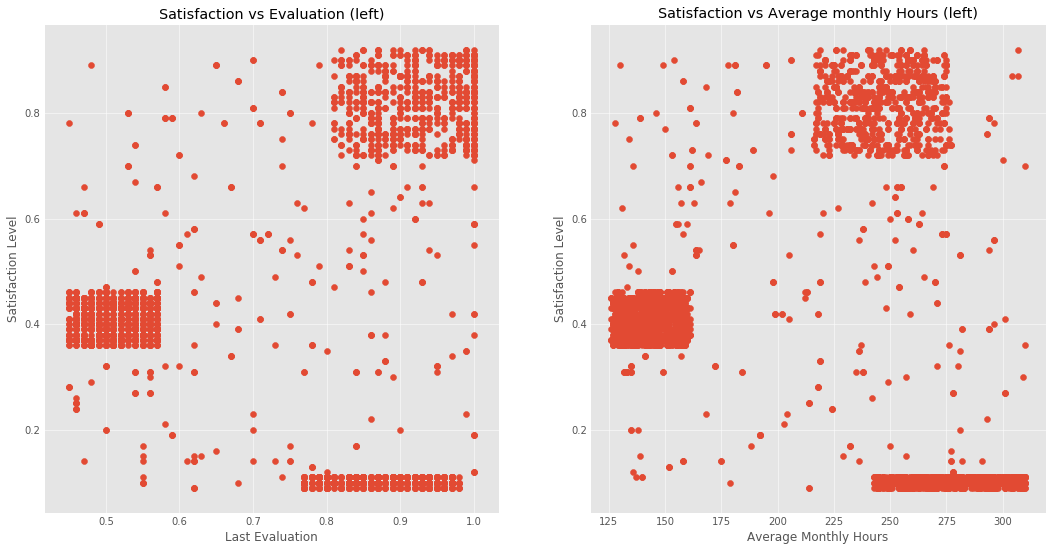

In [6]:
style.use("ggplot")

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(df_left_1["last_evaluation"], df_left_1["satisfaction_level"]) #scatter plot between last evaluation and Satisfaction level
plt.xlabel("Last Evaluation")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction vs Evaluation (left)")

plt.subplot(1,2,2)
plt.scatter(df_left_1["average_monthly_hours"], df_left_1["satisfaction_level"]) #scatter plot between Satisfaction level and avg. monthly hours
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction vs Average monthly Hours (left)")
plt.show()


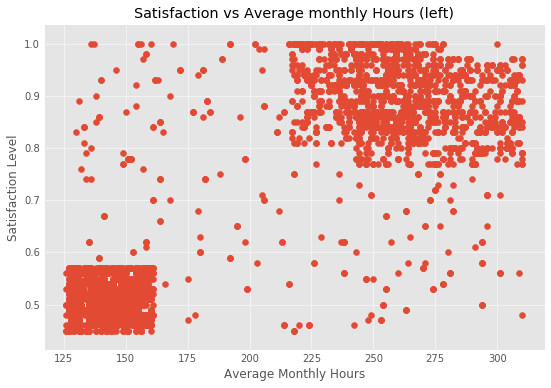

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df_left_1["average_monthly_hours"], df_left_1["last_evaluation"]) #scatter plot between average monthly hours and last eval.
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction vs Average monthly Hours (left)")
plt.show()


<Figure size 432x288 with 0 Axes>

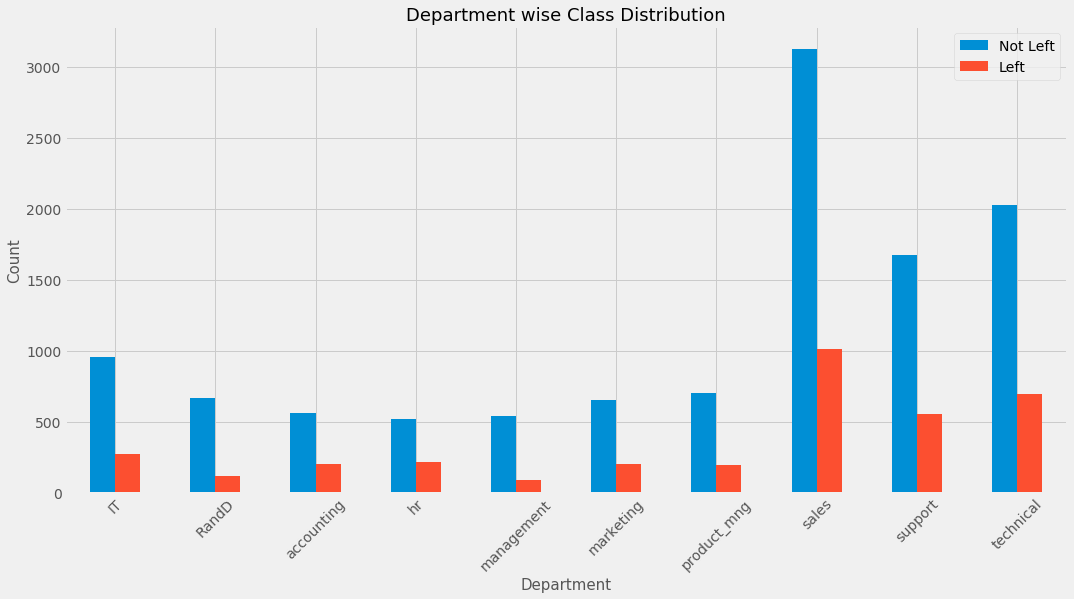

In [8]:
style.use("fivethirtyeight")
plt.figure()
# groupby department and left to count the attrition in every department
df1 = df.groupby(["department", "left"]).count().iloc[:, :1].unstack()
df1.columns =df1.columns.droplevel(0)
df1.columns = ["Not Left", "Left"]
#bar plot of employees that left and stayed in every department.
df1[["Not Left", "Left"]].plot(kind = 'bar', figsize = (16,8), rot = 45, sort_columns =True)
plt.xlabel("Department", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Department wise Class Distribution", fontsize = 18)
plt.show()

### Data Preprocessing
+ One-hot encoding of "department" feature.
+ Encoding of ordinal variable "Salary".

In [9]:
#create a dictionary to for labels in salary.
salary_mapping = {
    'low' : 1,
    'medium' : 2,
    'high' : 3
}

#mapping dictionary to 'salary'
df['salary'] = df['salary'].astype('str')
df['salary'] = df['salary'].map(salary_mapping)
df = pd.get_dummies(df)
df.head()
columns = df.columns.tolist()
columns = columns[:6] + columns[7:] + columns[6:7]
df = df[columns]
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,left
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### Correlation plot

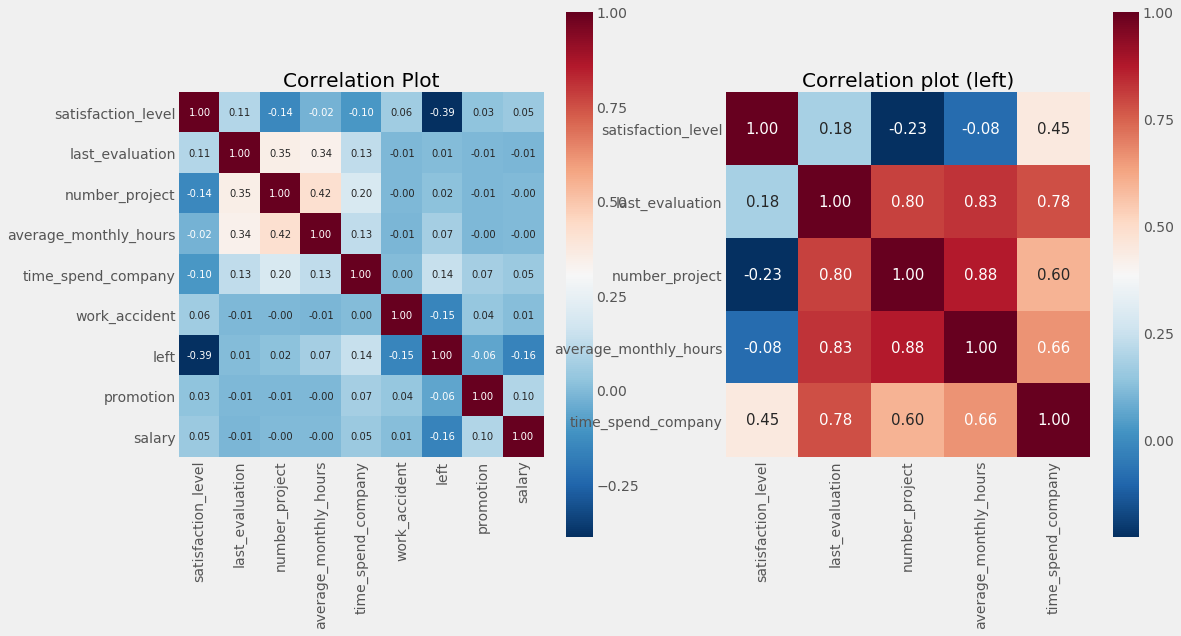

In [10]:
style.use("bmh")
#create a list of feature names among whom we need to  find the correlation
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion', 'salary']
#create a correlation matrix of variables mentioned above
cm = np.corrcoef(df[cols].values.T)

cols1 = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company']

#subset the dataframe to get the data of employees who left
df_left = df.loc[df['left'] == 1]
cm1 = np.corrcoef(df_left[cols1].values.T)

# Get heat map
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
hm = sns.heatmap(cm,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.title("Correlation Plot")

# Get heat map
plt.subplot(1,2,2)
hm = sns.heatmap(cm1,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols1,
                 xticklabels=cols1)
plt.title("Correlation plot (left)")

# Show heat map
plt.show()

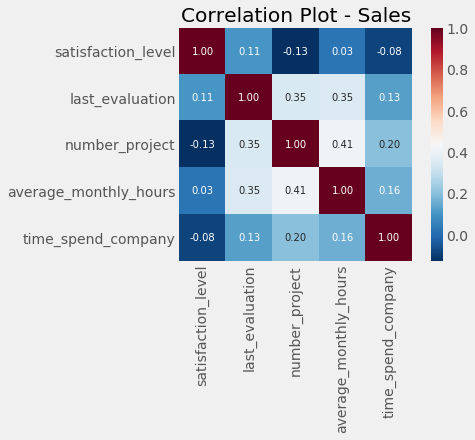

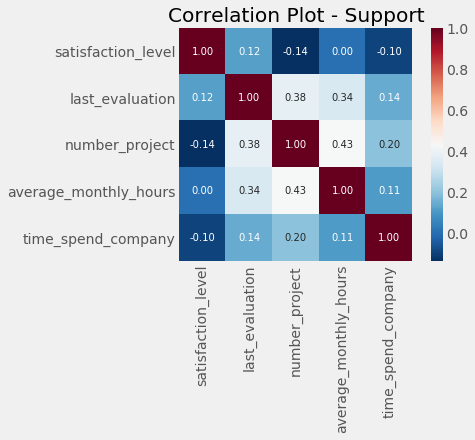

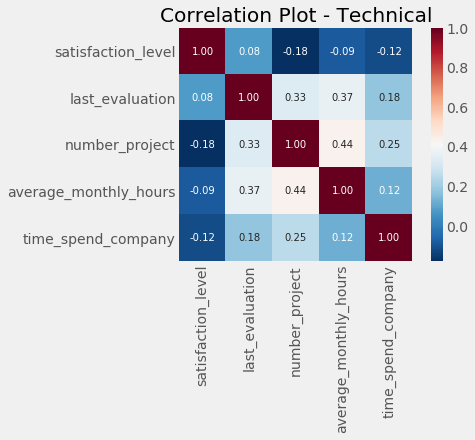

In [11]:
df_sales = df.loc[df["department_sales"] ==1]
cm_sales = np.corrcoef(df_sales[cols1].values.T)

# Get heat map

hm = sns.heatmap(cm_sales,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols1,
                 xticklabels=cols1)

plt.title("Correlation Plot - Sales")
plt.savefig("sales_correlation.png")
plt.show()

df_support = df.loc[df["department_support"] ==1]
cm_support = np.corrcoef(df_support[cols1].values.T)

# Get heat map

hm = sns.heatmap(cm_support,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols1,
                 xticklabels=cols1)

plt.title("Correlation Plot - Support")
plt.savefig("support_correlation.png")
plt.show()

df_technical = df.loc[df["department_technical"] ==1]
cm_technical = np.corrcoef(df_technical[cols1].values.T)

# Get heat map

hm = sns.heatmap(cm_technical,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols1,
                 xticklabels=cols1)

plt.title("Correlation Plot - Technical")
plt.savefig("Technical_correlation.png")
plt.show()



## Scaling the data and performing Train-Test split of the data

In [12]:
#get the names of columns to scale
column_name = df.columns[:5].tolist()
# for loop to scale the columns
for i in column_name:
    scaler = StandardScaler()
    scaler.fit(df[i].values.reshape(-1,1))
    df[i] = scaler.transform(df[i].values.reshape(-1,1))

#function to perform train test split    
def train_test(data_frame):    
    X = data_frame.iloc[:, :-1].values
    y = data_frame.iloc[:,-1:].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    return [X_train, X_test, y_train, y_test]

X_train, X_test, y_train, y_test = train_test(df)

In [13]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=0) #Create an instance of classifier
    clf.fit(X_train, y_train) #fit the classifier to Train data
    feature_importances = clf.feature_importances_ #retrieve feature importances
    
    plot_importances = pd.Series(feature_importances, df.columns[:-1])
    plot_importances.sort_values(ascending = False, inplace = True) #sort the feature importance in descending order
    plt.figure(figsize = (16,9), dpi = 250)
    plot_importances.plot(x='Features', y='Importance', kind = 'bar', rot = 45)    #plot feature importance
    plt.xticks(rotation='vertical')
    plt.savefig("feature_importances.png")
    plt.tight_layout()
    plt.show()
    
    y_pred = clf.predict(X_test) #predict on test data
    
    #calculate precision, recall, fscore and support
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    print("Precision: %.2f\nRecall: %.2f\nFscore: %.2f\nSupport: %s" % (precision, recall, fscore, support))
    print("\n %s" %classification_report(y_test, y_pred))
    
    #print accuracy score
    print("\nThe accuracy of the model is: %.2f" % (accuracy_score(y_test, y_pred)))
    print("\nConfusion Matrix is: ")
    #print confusion matrix
    print(confusion_matrix(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    
    #plot ROC curve
    plt.figure(figsize = (10,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC")
    plt.savefig("ROC_rf.png")
    plt.show()
    #print roc_auc_score
    print("\nThe roc_auc_score is %.3f" % roc_auc_score(y_test, y_pred))
    return fscore
    


### Logistic regression

In [14]:
def logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(random_state=0) #create an instance of logistic regression classifier
    clf.fit(X_train, y_train)        #fit the model
    y_pred = clf.predict(X_test)     #predict on test data
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    print("Precision: %.2f\nRecall: %.2f\nFscore: %.2f\nSupport: %s" % (precision, recall, fscore, support))
    print("\n %s" %classification_report(y_test, y_pred)) #print classification report
    print("\nThe accuracy of the model is: %.2f" % (accuracy_score(y_test, y_pred))) #print accuracy score
    print("\nConfusion Matrix is: ")
    print(confusion_matrix(y_test, y_pred)) #print confusion matrix
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    #plot ROC curve
    plt.figure(figsize = (10,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC")
    plt.savefig("ROC_lr.png")
    plt.show()
    print("\nThe roc_auc_score is %.3f" % roc_auc_score(y_test, y_pred))
    return fscore


### Support vector Machine

In [15]:
def support_vector_machine(X_train, X_test, y_train, y_test):
    svm = SVC(random_state=0) #create an instance of the classifier
    parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 10]} #parameters for gridsearch
    clf = GridSearchCV(svm, parameters) #Call gridsearch on the estimators
    clf.fit(X_train, y_train) #fit on train data
    y_pred = clf.predict(X_test) #predict on test data
    
    #calculate precision, recall, fscore, support
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    print("Precision: %.2f\nRecall: %.2f\nFscore: %.2f\nSupport: %s" % (precision, recall, fscore, support))
    print("\n %s" %classification_report(y_test, y_pred))
    print("\nThe accuracy of the model is: %.2f" % (accuracy_score(y_test, y_pred)))
    print("\nConfusion Matrix is: ")
    print(confusion_matrix(y_test, y_pred)) #print confusion matrix
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    #plot ROC for the classifier
    plt.figure(figsize = (10,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC")
    plt.savefig("ROC_svm.png")
    plt.show()
    print("\nThe roc_auc_score is %.3f" % roc_auc_score(y_test, y_pred))
    return fscore


Random Forest


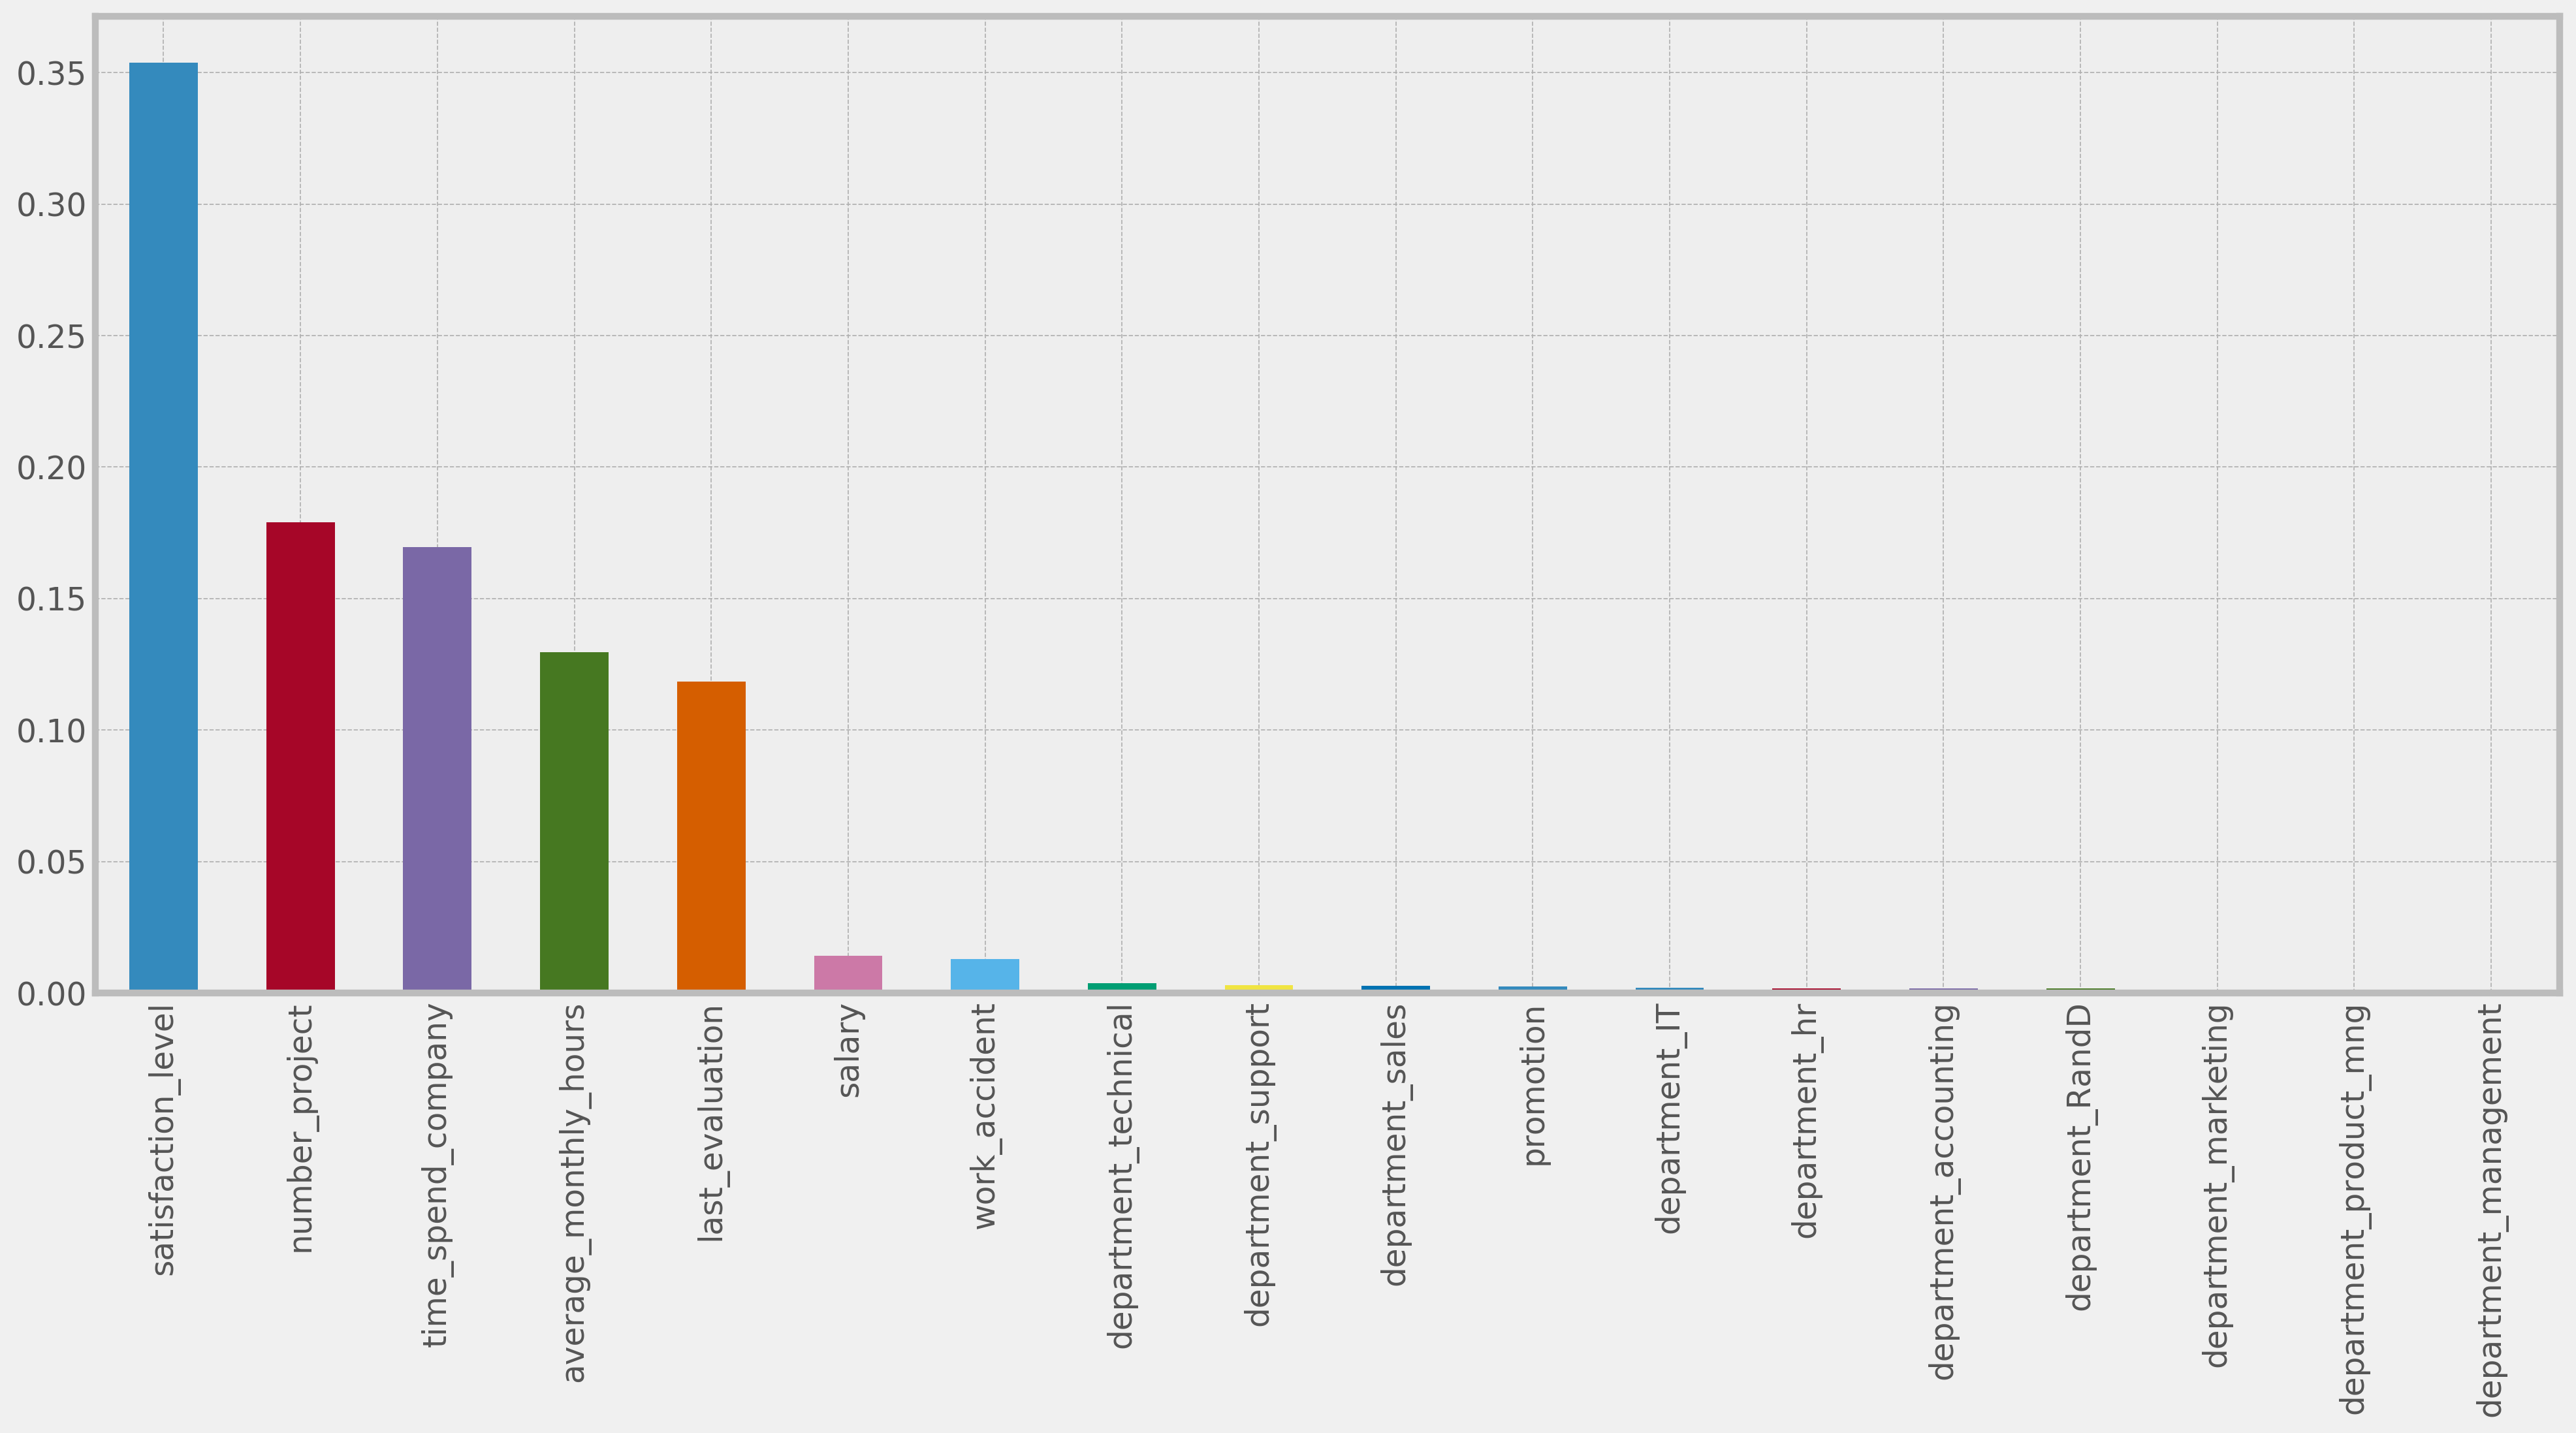

Precision: 0.99
Recall: 0.99
Fscore: 0.99
Support: None

              precision    recall  f1-score   support

          0       0.99      1.00      0.99      3462
          1       0.99      0.96      0.97      1038

avg / total       0.99      0.99      0.99      4500


The accuracy of the model is: 0.99

Confusion Matrix is: 
[[3448   14]
 [  44  994]]


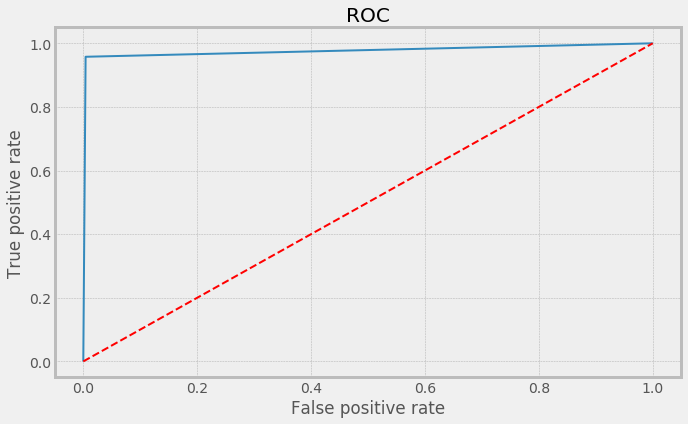


The roc_auc_score is 0.977



Logistic Regression

Precision: 0.77
Recall: 0.77
Fscore: 0.77
Support: None

              precision    recall  f1-score   support

          0       0.81      0.92      0.86      3462
          1       0.49      0.26      0.34      1038

avg / total       0.73      0.77      0.74      4500


The accuracy of the model is: 0.77

Confusion Matrix is: 
[[3179  283]
 [ 767  271]]


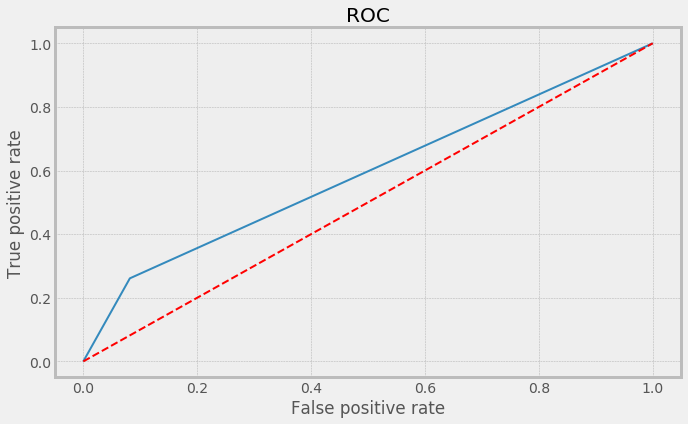


The roc_auc_score is 0.590



Support Vector Machine

Precision: 0.97
Recall: 0.97
Fscore: 0.97
Support: None

              precision    recall  f1-score   support

          0       0.98      0.99      0.98      3462
          1       0.96      0.92      0.94      1038

avg / total       0.97      0.97      0.97      4500


The accuracy of the model is: 0.97

Confusion Matrix is: 
[[3423   39]
 [  82  956]]


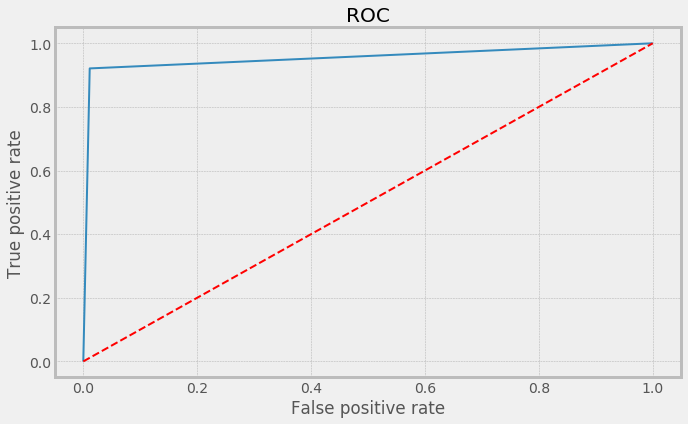


The roc_auc_score is 0.955


In [16]:
#append the fscores of every classifier to a list
fscores = []
print("Random Forest")
fscores.append(random_forest(X_train, X_test, y_train.ravel(), y_test.ravel()))
print("\n\n\nLogistic Regression\n")
fscores.append(logistic_regression(X_train[:,[0,1,3,4]], X_test[:,[0,1,3,4]], y_train.ravel(), y_test.ravel()))
print("\n\n\nSupport Vector Machine\n")
fscores.append(support_vector_machine(X_train[:,:5], X_test[:,:5], y_train.ravel(), y_test.ravel()))

### Fscore plot

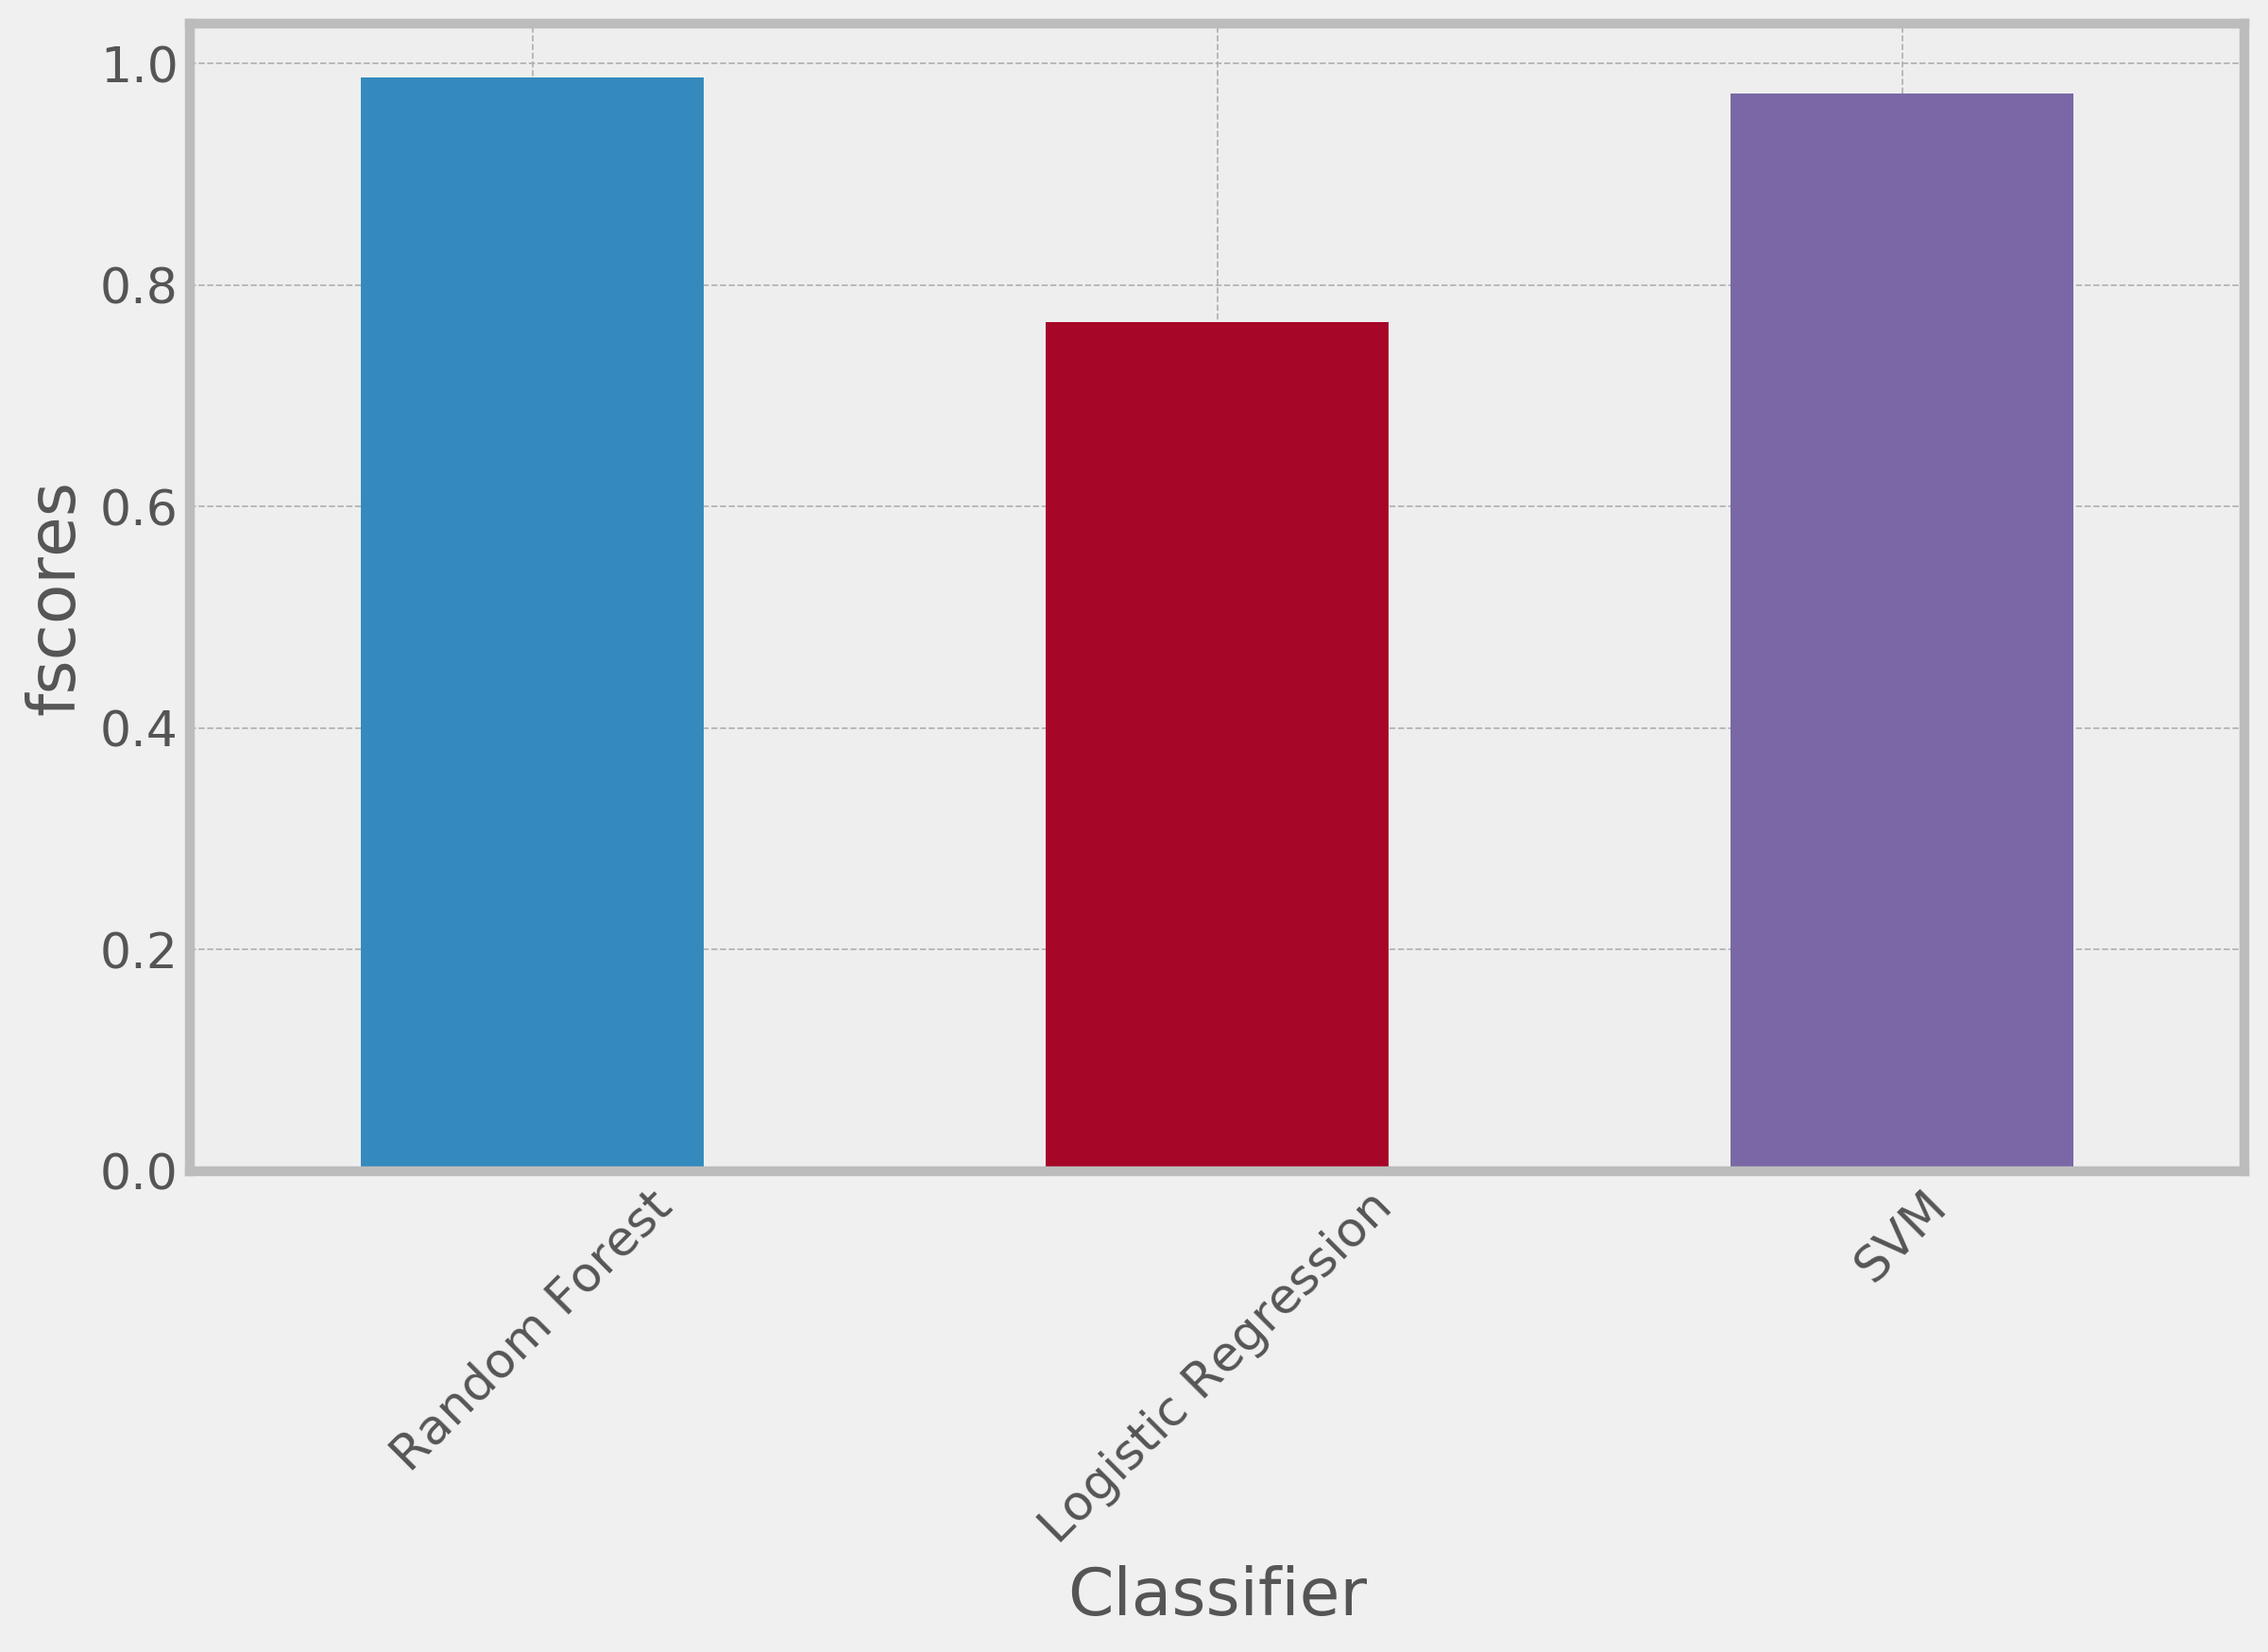

In [17]:
fscore_series = pd.Series(fscores, ["Random Forest", "Logistic Regression", "SVM"])

# Sort the array in descending order of the importances
plt.figure(figsize=(10, 6),dpi=250)

fscore_series.plot(kind='bar', fontsize=15, rot=45)
plt.xlabel('Classifier', fontsize=20)
plt.ylabel('fscores', fontsize=20)
plt.savefig("Fscores_comparision.png")
# Show the plot
plt.show()
